In [23]:
import numpy as np
import matplotlib.pyplot as plt

from twopbvp import two_p_BVP, get_f_vec
from beam import Beam
from sturmliouville import SL_solve
from schrodinger import TISE

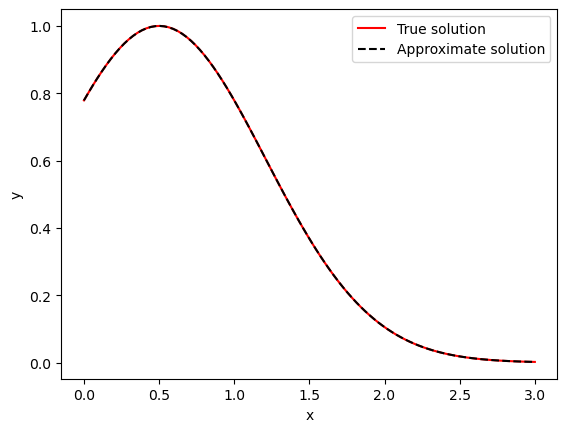

In [24]:
N = 100
L = 3
alpha = np.e**(-(0-1/2)**2)
beta = np.e**(-(L-1/2)**2)
f = lambda x: np.exp(-(x - 1/2)**2) * (4*(x - 1/2)**2 - 2)
x, y = two_p_BVP(*get_f_vec(f, L, N), alpha, beta)
g = lambda x: np.exp(-(x - 1/2)**2)
plt.plot(x, y, 'r')
plt.plot(x, g(x), '--k')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['True solution','Approximate solution'])
plt.savefig("plots/task1.1_func.pdf")
plt.show()

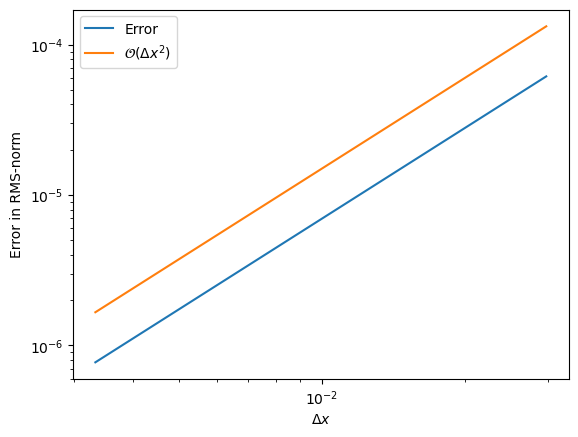

In [35]:
N = np.arange(100,1000,100)
L = 3
alpha = np.e**(-(0-1/2)**2)
beta = np.e**(-(L-1/2)**2)
RMS_error =  np.array([0.0]*np.size(N))
f = lambda x: np.exp(-(x - 1/2)**2) * (4*(x - 1/2)**2 - 2)
index = 0;
g = lambda x: np.exp(-(x - 1/2)**2)
for i in N:
    x, y = two_p_BVP(*get_f_vec(f, L, i), alpha, beta)
    error = np.abs(g(x) - y)
    RMS_error[index] = np.linalg.norm(error) / np.sqrt(i + 1)
    index += 1
stepsize = L / (N + 1)
plt.loglog(stepsize, RMS_error)
plt.loglog(stepsize, 0.15*stepsize**2)
plt.xlabel('$\Delta x$')
plt.ylabel('Error in RMS-norm')
plt.legend(["Error", "$\mathcal{O}(\Delta x^2)$"])
plt.savefig("plots/task1.1_error.pdf")
plt.show()

# Task 1.2

In [26]:
I = lambda x, L: 10**(-3) * (3 - 2 * np.cos(np.pi * x / L)**12) # m4
q = lambda x: -50 * 10**3 # N/m
L = 10 # m
E = 1.9 * 10**11 # N/m2
N = 999
beam = Beam(q, L, E, I)
x, u = beam.solve(N)

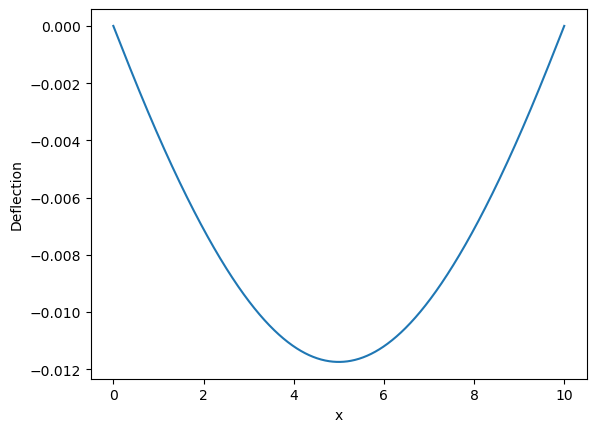

In [27]:
plt.plot(x, u)
plt.xlabel('x')
plt.ylabel('Deflection')
plt.savefig("plots/task1.2.pdf")
plt.show()
#plt.xlim(-1,1)

In [29]:
np.round(u[500], 8)

-0.01174106

# Task 2.1

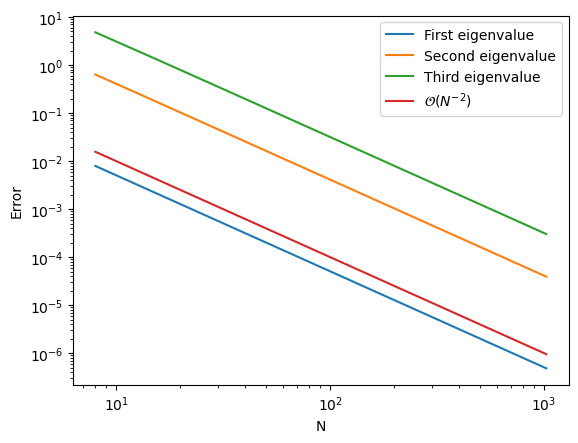

In [34]:
error1 = np.empty([8])
error2 = np.empty([8])
error3 = np.empty([8])

true_eig = lambda n: -(np.pi**2 / 4 + np.pi**2 * n + np.pi**2 * n**2)

true1 = true_eig(0)
true2 = true_eig(1)
true3 = true_eig(2)

for i in range(3,11):
    x, v, w = SL_solve(1, 2**i)
    error1[i - 3] = np.abs(true1 - w[0])
    error2[i - 3] = np.abs(true2 - w[1])
    error3[i - 3] = np.abs(true3 - w[2])

    
N = np.array([2**i for i in range(3,11)])
    
plt.loglog(N, error1)
plt.loglog(N, error2)
plt.loglog(N, error3)
plt.loglog(N, 1/N**2)
plt.xlabel('N')
plt.ylabel('Error')
plt.legend(['First eigenvalue', 'Second eigenvalue', 'Third eigenvalue', '$\mathcal{O}(N^{-2})$'])
plt.savefig("plots/task2.1_error.pdf")

In [31]:
x, v, w = SL_solve(1, 499)
w = -np.abs(w)
np.round(w, 8)

array([ -2.46739906, -22.20644487, -61.68375408])

In [32]:
np.round(true3, 8)

-61.68502751

In [ ]:
x, v, w = SL_solve(1, 100)

print(w)
plt.plot(x, v[:,0])
plt.plot(x, v[:,1])
plt.plot(x, v[:,2])
plt.xlabel('x')
plt.ylabel('u(x)')
plt.savefig("plots/task2.1_eigvec.pdf")
plt.show()

# Task 2.2

[  9.86957206+0.j  39.47790016+0.j  88.82382008+0.j 157.9053915 +0.j
 246.71989806+0.j 355.26384751+0.j]


/Users/emmaramme/Documents/0.LTH/NumDiff/numerical-differential-equations/project2/schrodinger.py:76: ComplexWarning: Casting complex values to real discards the imaginary part
  e = np.float64(e)
/Users/emmaramme/opt/anaconda3/envs/fmnn10/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


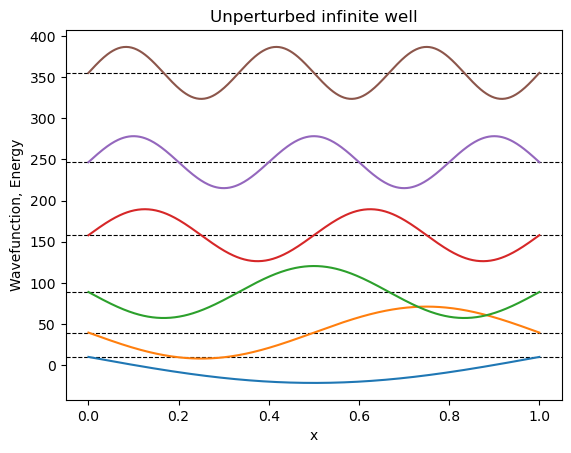

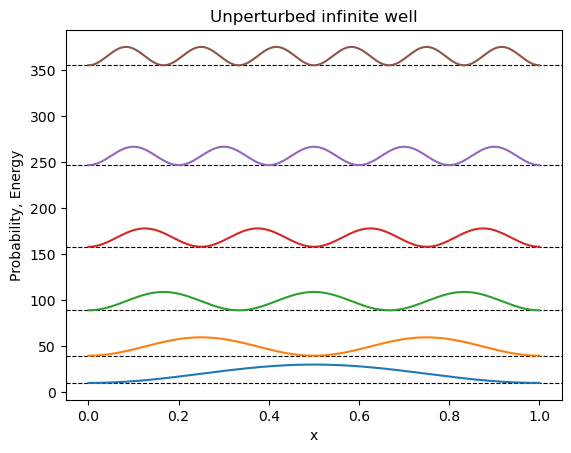

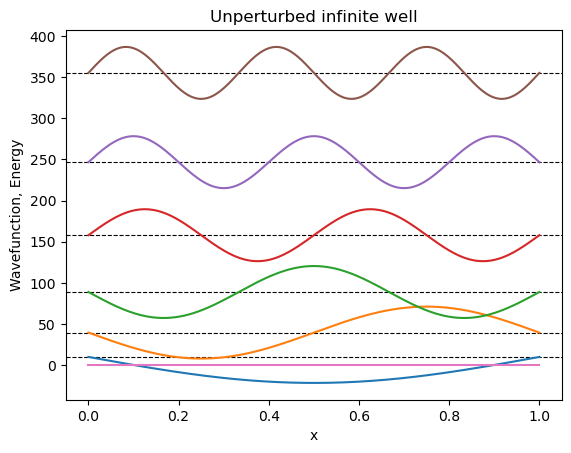

In [3]:
V0 = lambda x: 0
N = 500
tise1 = TISE(V0, 1)
x, psi, E, prob = tise1.solve(N)
print(E)
fig1, ax1, fig2, ax2 = TISE.plot(*tise1.solve(N), psi_savepath="plots/2.2/V0_psi.pdf", prob_savepath="plots/2.2/V0_prob.pdf", scale_psi = 500, scale_prob = 5000, title = "Unperturbed infinite well")
ax1.plot(x, np.vectorize(V0)(x), "k")
fig1

In [ ]:
plt.plot(x, np.vectorize(V0)(x))
plt.xlabel("x")
plt.ylabel("Potential")
plt.title("Unperturbed infinite well")
plt.savefig("plots/2.2/V0_potential.pdf")

[184.7405441 +0.j 183.84683942+0.j 307.56323651+0.j 339.24365139+0.j
 438.5163507 +0.j 536.04850044+0.j]


/Users/emmaramme/Documents/0.LTH/NumDiff/numerical-differential-equations/project2/schrodinger.py:76: ComplexWarning: Casting complex values to real discards the imaginary part
  e = np.float64(e)
/Users/emmaramme/opt/anaconda3/envs/fmnn10/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


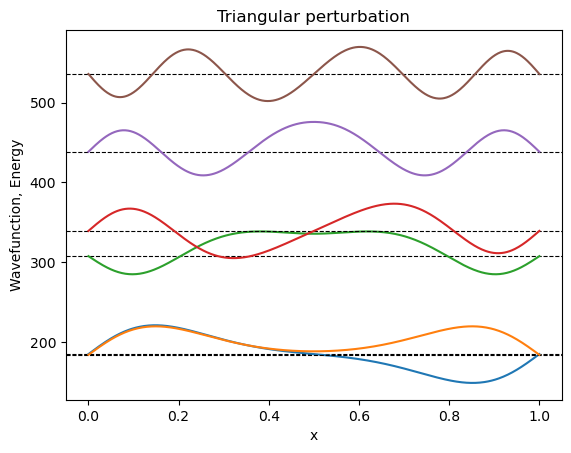

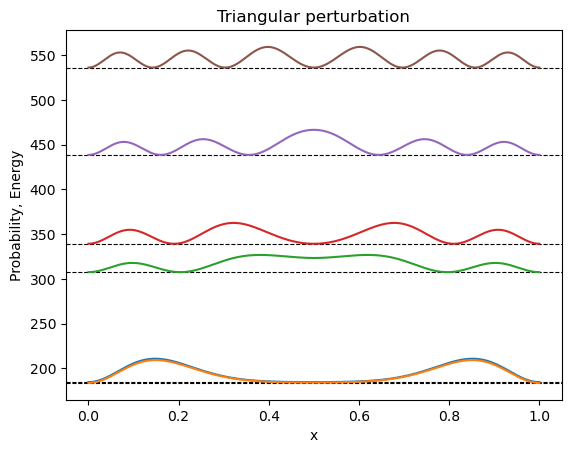

In [10]:
V1 = lambda x: 700*(0.5 - np.abs(x - 0.5))
N = 500
tise1 = TISE(V1, 1)
x, psi, E, prob = tise1.solve(N)
print(E)
fig1, ax1, fig2, ax2 = TISE.plot(*tise1.solve(N), psi_savepath="plots/2.2/V1_psi.pdf", prob_savepath="plots/2.2/V1_prob.pdf", scale_psi = 500, scale_prob = 5000, title = "Triangular perturbation")
ax1.plot(x, np.vectorize(V1)(x), "k", linewidth=0.7)
fig1.savefig("plots/2.2/V1_psi_w_p.pdf")
ax2.plot(x, np.vectorize(V1)(x), "k", linewidth=0.7)
fig2.savefig("plots/2.2/V1_prob_w_p.pdf")

In [ ]:
plt.plot(x, V1(x))
plt.xlabel("x")

plt.ylabel("Potential")
plt.title("Triangular perturbation")
plt.savefig("plots/2.2/V1_potential.pdf")

/Users/emmaramme/Documents/0.LTH/NumDiff/numerical-differential-equations/project2/schrodinger.py:76: ComplexWarning: Casting complex values to real discards the imaginary part
  e = np.float64(e)
/Users/emmaramme/opt/anaconda3/envs/fmnn10/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


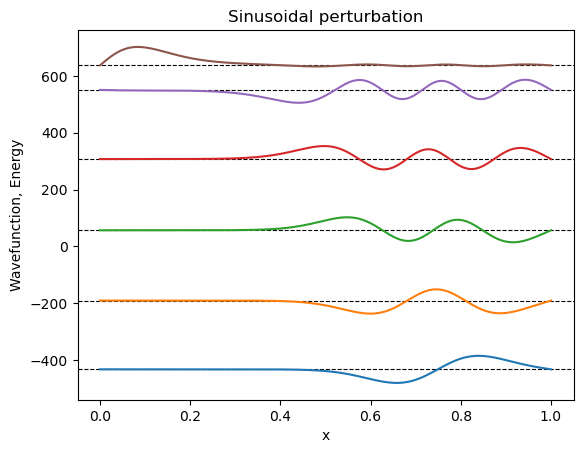

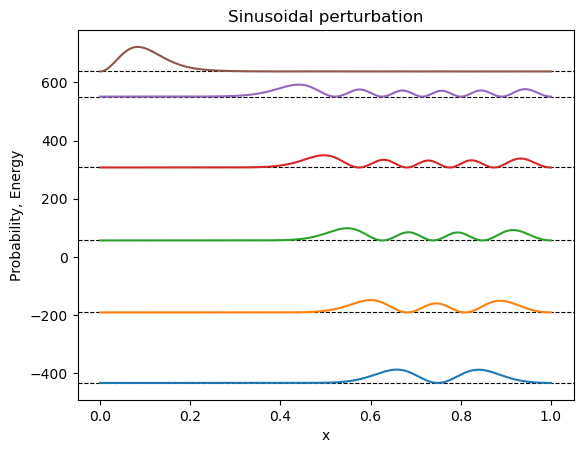

In [11]:
V2 = lambda x: 800*np.sin(2*np.pi*x)
eq = TISE(V2, 1)
x, psi, E, prob = eq.solve(500)
fig1, ax1, fig2, ax2 = TISE.plot(x, psi, E, prob,psi_savepath="plots/2.2/V2_psi.pdf", prob_savepath="plots/2.2/V2_prob.pdf", scale_psi = 500, scale_prob = 5000, title = "Sinusoidal perturbation")
ax1.plot(x, np.vectorize(V2)(x), "k", linewidth=0.7)
fig1.savefig("plots/2.2/V2_psi_w_p.pdf")
ax2.plot(x, np.vectorize(V2)(x), "k", linewidth=0.7)
fig2.savefig("plots/2.2/V2_prob_w_p.pdf")

[ 40.54940911+0.j  40.55378768+0.j 162.19073778+0.j 162.20830174+0.j
 364.94299507+0.j 364.903289  +0.j]


/Users/emmaramme/Documents/0.LTH/NumDiff/numerical-differential-equations/project2/schrodinger.py:76: ComplexWarning: Casting complex values to real discards the imaginary part
  e = np.float64(e)
/Users/emmaramme/opt/anaconda3/envs/fmnn10/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


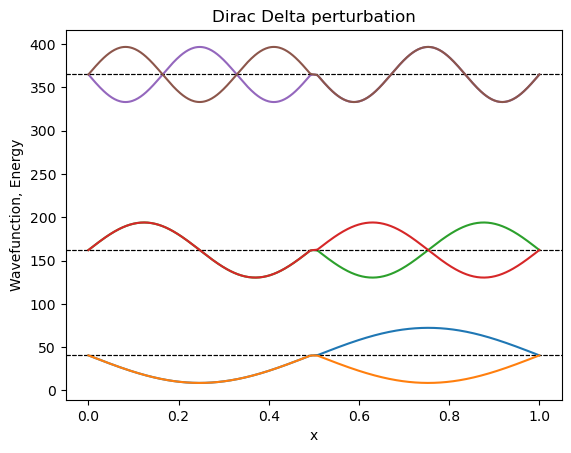

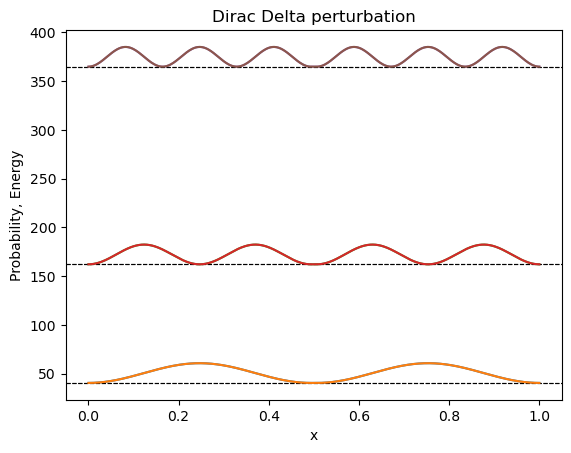

In [20]:
def delta(a):
    return lambda x: (100000 if np.abs(x - a) < 0.01 else 0)


V3_vect = np.vectorize(delta(0.5))
N = 500
tise1 = TISE(V3_vect, 1)
x, psi, E, prob = tise1.solve(N)
print(E)
fig1, ax1, fig2, ax2 = TISE.plot(*tise1.solve(N),psi_savepath="plots/2.2/V3_psi.pdf", prob_savepath="plots/2.2/V3_prob.pdf", scale_psi = 500, scale_prob = 5000, title = "Dirac Delta perturbation")
ax1.plot(x, V3_vect(x), "k", linewidth=0.7)
ax1.set_ylim(-10, 450)
fig1.savefig("plots/2.2/V3_psi_w_p.pdf")
ax2.plot(x, V3_vect(x), "k", linewidth=0.7)
ax2.set_ylim(-10, 450)
fig2.savefig("plots/2.2/V3_prob_w_p.pdf")

In [ ]:
plt.plot(x, V3_vect(x))
plt.xlabel("x")
plt.ylabel("Potential")
plt.title("Dirac Delta perturbation")
plt.savefig("plots/2.2/V3_potential.pdf")

[ 86.55691118+0.j  91.63303803+0.j  92.01345582+0.j 346.19569942+0.j
 366.49289159+0.j 368.01833573+0.j]


/Users/emmaramme/Documents/0.LTH/NumDiff/numerical-differential-equations/project2/schrodinger.py:76: ComplexWarning: Casting complex values to real discards the imaginary part
  e = np.float64(e)
/Users/emmaramme/opt/anaconda3/envs/fmnn10/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


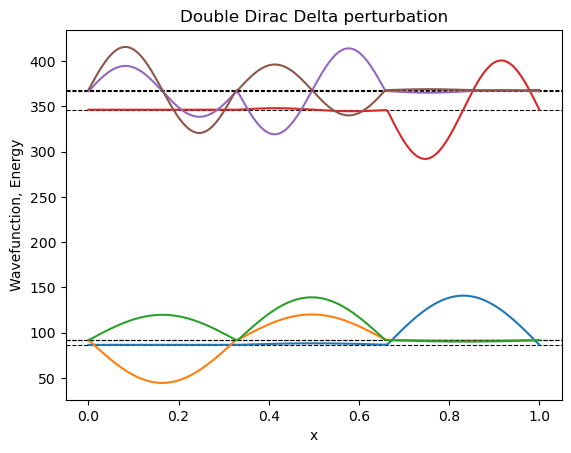

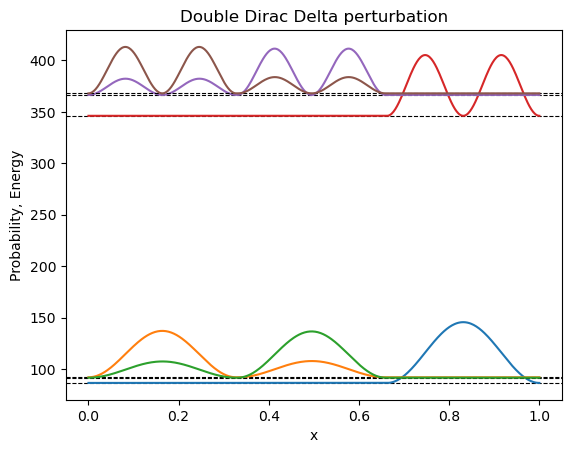

In [21]:
def delta2(a,b):
    return lambda x: (100000 if (np.abs(x - a) < 0.005 or np.abs(x-b)<0.005) else 0)

V4_vect = np.vectorize(delta2(0.33,0.66))
N = 500
tise1 = TISE(V4_vect, 1)
x, psi, E, prob = tise1.solve(N)
print(E)
fig1, ax1, fig2, ax2 = TISE.plot(*tise1.solve(N),psi_savepath="plots/2.2/V4_psi.pdf", prob_savepath="plots/2.2/V4_prob.pdf", scale_psi = 500, scale_prob = 5000, title = "Double Dirac Delta perturbation")
ax1.plot(x, V4_vect(x), "k", linewidth=0.7)
ax1.set_ylim(-10, 450)
fig1.savefig("plots/2.2/V4_psi_w_p.pdf")
ax2.plot(x, V4_vect(x), "k", linewidth=0.7)
ax2.set_ylim(-10, 450)
fig2.savefig("plots/2.2/V4_prob_w_p.pdf")

In [ ]:
plt.plot(x, V4_vect(x))
plt.xlabel("x")
plt.ylabel("Potential")
plt.title("Double Dirac Delta perturbation")
plt.savefig("plots/2.2/V4_potential.pdf")